## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
data = datasets.load_wine()
print(data.keys())
print(data['DESCR'])
print(data.target)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:              

In [3]:
# ?linear_model.LogisticRegression
'''
這是一個分類問題，並且還不是二分類，採用邏輯斯迴歸，
其中的multi_class參數：
'ovr'是把各個類別當成二分類對待，所以每個類別都會有一個自己的二分類模型。
'multinomial'是直接分類，因此不管有幾個分類，都只會有一個模型，此時solver不可為liblinear。
'auto'是依solver自動進行選擇multi_class的值。
'''
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1, random_state=4)
model = linear_model.LogisticRegression(solver='liblinear',multi_class='auto') #明顯地，這裡的auto將會自動選擇ovr
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9444444444444444


In [4]:
data = datasets.load_boston()

In [5]:
print(data.keys())
print(data['DESCR'])
print(data.target)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [6]:
'''
這是一個迴歸問題，採用線性迴歸
'''
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1, random_state=4)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Coefficients: ', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Mean squared error: 17.04


Text(0, 0.5, 'Measured')

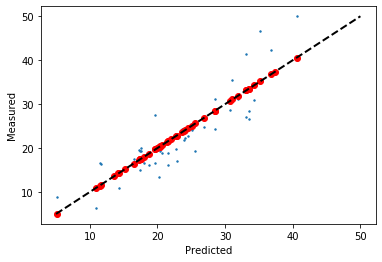

In [7]:
plt.scatter(y_pred,y_test,s=2)
plt.plot(y_pred, y_pred, 'ro')
plt.plot([data.target.min(), data.target.max()], [data.target.min(), data.target.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')